In [402]:
%config InlineBackend.figure_format = 'svg'

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# filenames and locations
working_dir = '/Users/ptaufalele/Documents/Sites/COVID-19'
data_folder = '/csse_covid_19_data'
tseries_folder = '/csse_covid_19_time_series'
tseries_confirmed = '/time_series_covid19_confirmed_global.csv'

In [9]:
tseries_df = pd.read_csv(working_dir+data_folder+tseries_folder+tseries_confirmed)

In [25]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [20]:
# search by either province/state
#series_df.loc[tseries_df['Province/State'] == 'Texas']

# search by country/region
tseries_df.loc[tseries_df['Country/Region'] == 'United States']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20


In [23]:
tseries_df = tseries_df.drop(columns = ['Lat', 'Long'])

In [27]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [31]:
afghan = tseries_df.loc[tseries_df['Country/Region'] == 'Afghanistan']

In [32]:
afghan

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170


# I want to combine the province/state or country/region column

If there row has a province/state, then i want that to be the rowname
If not, then i want the country/region to be the rowname

In [67]:
type(afghan['Province/State'])

pandas.core.series.Series

In [74]:
pd.isnull(afghan.iloc[0]['Province/State'])

True

In [87]:
def defineRegion(row):
    if pd.isnull(row['Province/State']):
        return row['Country/Region'];
    else :
        return row['Province/State']

In [90]:
tseries_df['Territory'] = tseries_df.apply(defineRegion, axis = 1)

In [159]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Territory,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
Albania,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
Algeria,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
Andorra,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
Angola,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [94]:
tseries_df = tseries_df.set_index('Territory')

In [158]:
tseries_df.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Territory,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
Albania,NaN,Albania,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
Algeria,NaN,Algeria,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
Andorra,NaN,Andorra,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
Angola,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [218]:
fuck = tseries_df.loc[['US', 'Spain', 'Italy', 'Georgia'], '1/22/20':]

In [219]:
fuck

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Territory,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807
Spain,0,0,0,0,0,0,0,0,0,0,...,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956
Italy,0,0,0,0,0,0,0,0,0,2,...,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739
Georgia,0,0,0,0,0,0,0,0,0,0,...,49,54,61,70,75,79,83,90,91,103


In [220]:
n_dates = len(fuck.iloc[0])

In [221]:
n_dates

69

In [222]:
dateList = pd.date_range(pd.datetime(2020,1,22), periods = n_dates).tolist()

In [223]:
fuck = fuck.transpose()

In [224]:
fuck['Dates'] = dateList;

In [225]:
fuck = fuck.set_index('Dates')

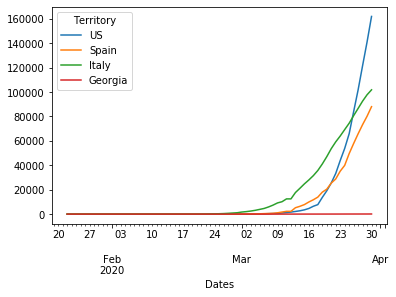

In [227]:
fuck.plot()

In [298]:
countries = ['US', 'Italy', 'Spain', 'Iran']

In [299]:
fuck = tseries_df.loc[countries, '3/1/20':]
n_dates = len(fuck.iloc[0])
n_dates
dateList = pd.date_range(pd.datetime(2020,3,1), periods = n_dates).tolist()
fuck = fuck.transpose()
fuck['Dates'] = dateList;
fuck = fuck.set_index('Dates')

In [465]:
plt.rcParams['figure.figsize'] = [8,8]

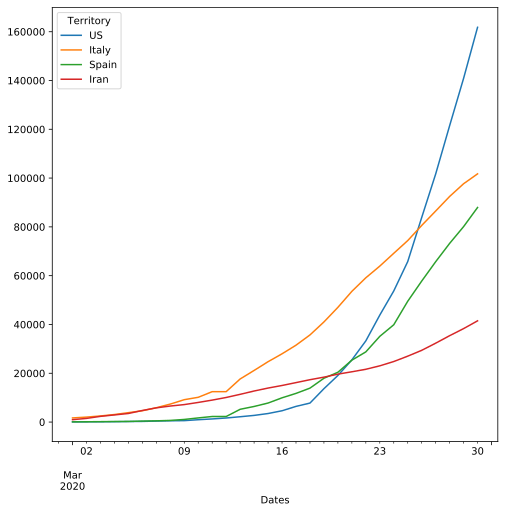

In [305]:
fuck.plot()

In [302]:
import plotly.graph_objects as go

In [308]:
import plotly as py

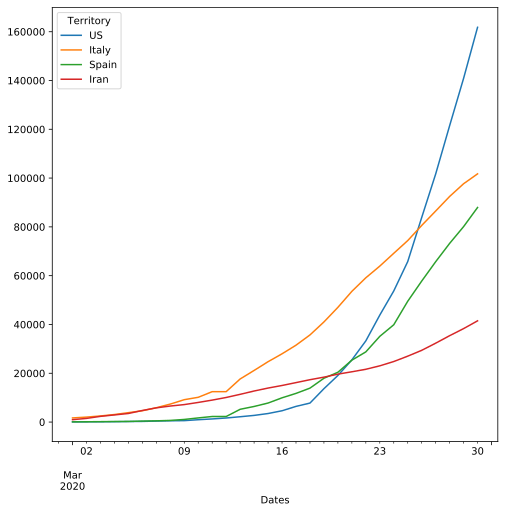

In [312]:
fuck.plot()
mpl_fig_obj = plt.figure

In [326]:
fuck.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30'],
              dtype='datetime64[ns]', name='Dates', freq=None)

In [337]:
fuck.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30'],
              dtype='datetime64[ns]', name='Dates', freq=None)

In [355]:
import plotly.express as px
fig = px.line(fuck, x = 'Dates', y = 'US')
fig.show()

In [354]:
fuck = fuck.reset_index();

In [356]:
fig = go.Figure()

In [487]:
fuck.columns

Index(['Dates', 'US', 'Italy', 'Spain', 'Iran'], dtype='object', name='Territory')

In [400]:
for i in range(1,5):
    fig.add_trace(go.Scatter(x = fuck['Dates'], y = fuck.iloc[:,i], mode = 'lines', name = fuck.columns[i], connectgaps = True))
fig.show()

In [398]:
fuck.iloc[:,1][29]

161807

In [492]:
fig = go.Figure()
labels = fuck.columns[1:5].tolist();
mode_size = [3,2,1, 0.5]
line_size = [3,2,1,0.5]
colors = [ 'rgb(49,130,189)', 'rgb(245, 147, 66)', 'rgb(245, 66, 66)', 'rgb(23, 191, 48)']
for i in range(1,5):
    fig.add_trace(go.Scatter(x = fuck['Dates'], y = fuck.iloc[:,i], mode = 'lines+markers', name = fuck.columns[i], 
                             line = dict(color = colors[i-1], width = line_size[i-1]), connectgaps = True))
    fig.add_trace(go.Scatter(x =[fuck['Dates'][0], fuck['Dates'][29]], 
                            y = [fuck.iloc[:,i][0], fuck.iloc[:,i][29]], mode = 'markers', marker = dict(color=colors[i-1], size= mode_size[i-1])))
    
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204,204,204)',
        linewidth=2,
        ticks='outside', 
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82,82,82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
        ),
    autosize=False,
    width = 800, height = 800,
    showlegend=False,
    plot_bgcolor = 'white'
)

annotations = []

# Adding Labels
for y_trace, label, color in zip(fuck.iloc[:,1:5].values.transpose(), labels, colors):
    annotations.append(dict(xref='paper', x=0.95, y = y_trace[-1],
                                                       xanchor = 'left', yanchor = 'middle', 
                                                       text = label.format(y_trace[-1]), 
                                                        font = dict(family='Arial', size = 16), showarrow = False))
annotations.append(dict(xref='paper', yref='paper', x = 0.0, y = 1.05, xanchor = 'left', yanchor = 'bottom', text = 'March Rona Cases',
                                       font = dict(family = 'Arial', size = 35, color = 'rgb(37,37,37)'), showarrow = False))
fig.update_layout(annotations=annotations)


In [490]:
py.offline.plot(fig, filename = 'rona-file.html')

'rona-file.html'

In [493]:
pop_size = [330522207, 60483646, 46750324, 83724702];

In [497]:
fuck_p = copy.deepcopy(fuck)

In [496]:
import copy

In [504]:
fuck_p['US'] = fuck['US'].apply(lambda x: 100*x/pop_size[0])
fuck_p['Italy'] = fuck['Italy'].apply(lambda x: 100*x/pop_size[1])
fuck_p['Spain'] = fuck['Spain'].apply(lambda x: 100*x/pop_size[2])
fuck_p['Iran'] = fuck['Iran'].apply(lambda x: 100*x/pop_size[3])

In [505]:
fuck_p

Territory,Dates,US,Italy,Spain,Iran
0,2020-03-01,0.000022,0.002801,0.000180,0.001168
1,2020-03-02,0.000030,0.003366,0.000257,0.001793
2,2020-03-03,0.000036,0.004137,0.000353,0.002790
3,2020-03-04,0.000045,0.005107,0.000475,0.003490
4,2020-03-05,0.000066,0.006379,0.000554,0.004196
5,2020-03-06,0.000079,0.007665,0.000856,0.005670
6,2020-03-07,0.000122,0.009727,0.001070,0.006955
7,2020-03-08,0.000157,0.012193,0.001440,0.007842
8,2020-03-09,0.000176,0.015164,0.002295,0.008553
9,2020-03-10,0.000290,0.016780,0.003626,0.009605


In [507]:
fig = go.Figure()
labels = fuck_p.columns[1:5].tolist();
mode_size = [3,2,1, 0.5]
line_size = [3,2,1,0.5]
colors = [ 'rgb(49,130,189)', 'rgb(245, 147, 66)', 'rgb(245, 66, 66)', 'rgb(23, 191, 48)']
for i in range(1,5):
    fig.add_trace(go.Scatter(x = fuck_p['Dates'], y = fuck_p.iloc[:,i], mode = 'lines+markers', name = fuck_p.columns[i], 
                             line = dict(color = colors[i-1], width = line_size[i-1]), connectgaps = True))
    fig.add_trace(go.Scatter(x =[fuck_p['Dates'][0], fuck_p['Dates'][29]], 
                            y = [fuck_p.iloc[:,i][0], fuck_p.iloc[:,i][29]], mode = 'markers', marker = dict(color=colors[i-1], size= mode_size[i-1])))
    
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204,204,204)',
        linewidth=2,
        ticks='outside', 
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82,82,82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
        ),
    autosize=False,
    width = 800, height = 800,
    showlegend=False,
    plot_bgcolor = 'white',
    yaxis_title = 'Percent of Population'
)

annotations = []

# Adding Labels
for y_trace, label, color in zip(fuck_p.iloc[:,1:5].values.transpose(), labels, colors):
    annotations.append(dict(xref='paper', x=0.95, y = y_trace[-1],
                                                       xanchor = 'left', yanchor = 'middle', 
                                                       text = label.format(y_trace[-1]), 
                                                        font = dict(family='Arial', size = 16), showarrow = False))
annotations.append(dict(xref='paper', yref='paper', x = 0.0, y = 1.05, xanchor = 'left', yanchor = 'bottom', text = 'March Rona Cases',
                                       font = dict(family = 'Arial', size = 35, color = 'rgb(37,37,37)'), showarrow = False))
fig.update_layout(annotations=annotations)


In [508]:
crit_per_100k = 34.7/100000

In [511]:
crit = 330522207 * 34.7 / 100000

In [512]:
crit

114691.20582900001

In [517]:
fuck_p['US'] = fuck['US'].apply(lambda x: 100* x * 0.01 / crit)

In [518]:
fuck_p

Territory,Dates,US,Italy,Spain,Iran
0,2020-03-01,0.000645,0.002801,0.000180,0.001168
1,2020-03-02,0.000854,0.003366,0.000257,0.001793
2,2020-03-03,0.001029,0.004137,0.000353,0.002790
3,2020-03-04,0.001299,0.005107,0.000475,0.003490
4,2020-03-05,0.001892,0.006379,0.000554,0.004196
5,2020-03-06,0.002284,0.007665,0.000856,0.005670
6,2020-03-07,0.003505,0.009727,0.001070,0.006955
7,2020-03-08,0.004516,0.012193,0.001440,0.007842
8,2020-03-09,0.005083,0.015164,0.002295,0.008553
9,2020-03-10,0.008362,0.016780,0.003626,0.009605


In [519]:
yeet = go.Figure()

yeet.add_trace(go.Scatter(x = fuck_p['Dates'], y = fuck_p['US'], mode = 'lines', connectgaps = True))
